# Data Exploration
## Basic Visualisation
## Calculate Correlation

In [1]:
import math
import pandas as pd
from sklearn import neighbors, datasets , preprocessing
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix, roc_curve
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, train_test_split
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
df = pd.read_csv('mm_master_demos.csv')
del df['Unnamed: 0']
del df['file']
del df['date']
del df['seconds']
del df['att_team']
del df['att_side']
del df['vic_team']
del df['vic_side']
del df['winner_team']
del df['winner_side']
del df['att_id']
del df['vic_id']
del df['award']
del df['is_bomb_planted']
del df['bomb_site']
data=df.copy()
data=shuffle(data)
data

map  round    tick  hp_dmg  arm_dmg    hitbox          wp  \
443853   de_inferno     11   68806       7        0     Chest       SG556   
413454     de_cache     16   93534      10        6     Chest       Glock   
912685     de_cache      6   39466      23        6     Chest        P250   
953833     de_dust2      3   16074      13        0  RightLeg         UMP   
200750   de_inferno     17  103191      28        4   Stomach          CZ   
554025     de_cbble     18  111162      13        3     Chest        AK47   
521316     de_dust2     16  102743      10        6     Chest       Glock   
692033     de_cache      6   45197      16        7   Stomach        P250   
620117    de_mirage     16  105933      85        0      Head         USP   
530047   de_inferno     17  120824      13        4     Chest         MP7   
135089     de_cache     27  149888      25        3     Chest        P250   
766714     de_aztec     13   63906       8        0   Generic  Incendiary   
749699     de_dust2     24  135865      27        3  RightArm        AK47   
496047  de_overpass     26  171791      33        4   Stomach        AK47   
297718  de_overpass     20  129094      14        6   Stomach         MP9   
549383    de_mirage     28  166972      15        3     Chest        M4A4   
852111    de_mirage     28  178513      23        0   LeftLeg        M4A4   
733653   de_inferno      5   30201      13        4  RightArm       Mac10   
8378       de_dust2     25  153153      57       12      Head         P90   
172904     de_dust2      8   53190      22        4     Chest        M4A1   
263234   de_inferno      3   15485      33        4   Stomach        AK47   
814975    de_mirage     12   94984      26        7   Stomach        P250   
677612    de_mirage     17  103323      12        6     Chest       Glock   
878212     de_cache      6   42057      38        0   Stomach        M4A4   
226115     de_dust2      3   24448      15        4     Chest         MP7   
107825     de_cache     21  133810      28        6   Stomach        M4A4   
207149    de_mirage      7   35464     100        1     Chest         AWP   
370541  de_overpass     11   73508       6        0   Generic     Unknown   
219447  de_overpass     20  137884      23        4     Chest        M4A1   
878336     de_cache     10   72565      16        0     Chest        AK47   
...             ...    ...     ...     ...      ...       ...         ...   
342333     de_dust2     18  110077       8        0   Generic  Incendiary   
698868     de_cache      3   19411       8        9   Stomach       Glock   
553923     de_cbble     16  101576      11        6     Chest       Glock   
603074     de_dust2     13   77757      21        0   LeftLeg        Tec9   
403266     de_dust2     22  148242      56       19      Head        M4A1   
581060   de_inferno     20  118198       4        0   Stomach        M4A1   
932596    de_mirage      5   36908      22        4     Chest        M4A4   
851623    de_mirage     13   93690      27        3     Chest        AK47   
164801     de_cache     14   82751      22        4     Chest        M4A4   
829603     de_cbble      5   28361      39       13   Generic          HE   
776222     de_cache     26  178611      26        3     Chest        AK47   
514360    de_mirage      9   52706       6        0  RightLeg        M4A4   
279843     de_train     15   97553      13        0  RightLeg         UMP   
329833     de_dust2     12   89353      24        1   LeftArm   FiveSeven   
199292    de_mirage     19  127583      11       19      Head        M4A4   
849851  de_overpass     15  101619      16        5  RightArm         MP7   
173373     de_dust2      4   20659      23        5   Stomach        M4A1   
10455      de_dust2     27  157093      49       16   Generic          HE   
645176      de_nuke     21  122384      34        0  RightArm        AK47   
659671    de_mirage     13   77270      46        0      Head      XM1014   
206573     d

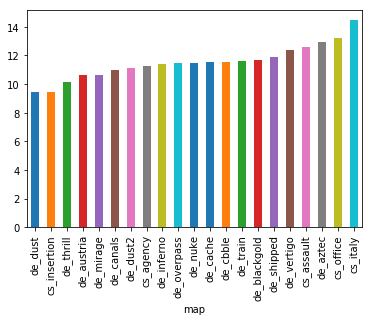

In [3]:
data.groupby('map')['att_rank'].mean().sort_values().plot(kind='bar')

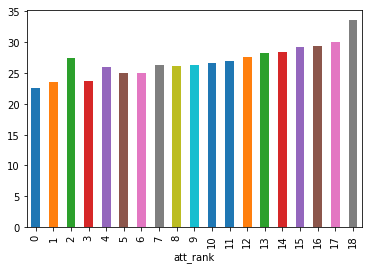

In [4]:
data.groupby('att_rank')['hp_dmg'].mean().plot(kind='bar')

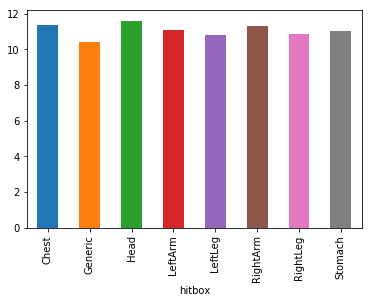

In [5]:
data.groupby('hitbox')['att_rank'].mean().plot(kind='bar')

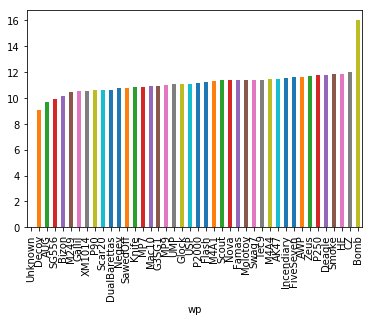

In [6]:
data.groupby('wp')['att_rank'].mean().sort_values().plot(kind='bar')

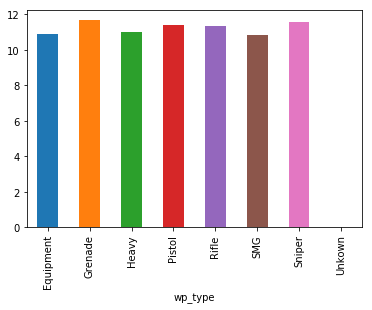

In [7]:
data.groupby('wp_type')['att_rank'].mean().plot(kind='bar')

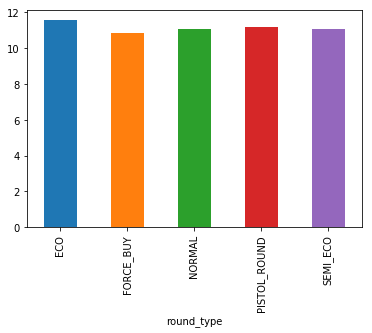

In [8]:
data.groupby('round_type')['att_rank'].mean().plot(kind='bar')

In [9]:
data.round_type.value_counts()

NORMAL          425090
ECO             244599
FORCE_BUY       143944
PISTOL_ROUND     75133
SEMI_ECO         66700
Name: round_type, dtype: int64

In [10]:
data.dtypes

map                object
round               int64
tick                int64
hp_dmg              int64
arm_dmg             int64
hitbox             object
wp                 object
wp_type            object
att_rank            int64
vic_rank            int64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
round_type         object
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
dtype: object

# Data Preparation
## Filer
- Normalization
- Convert Text values to numbers

## Convert Categories
### Hitbox
Head and Chest --> UpperBody --> 0
Stomach and Arms --> CenterBody --> 1
Legs and Generic --> LowerBody --> 2

### Map
low skill high skill?

### Weapons
one hot encode has_bomb --> can KNN handle 0 values?
what todo with rest??

### Round Type
ECO --> 0
NORMAL, PISTOL, SEMI_ECO --> 1
FORCE_BUY --> 2

In [11]:
numeric_cats = {
    "hitbox": {"Head": 0, "Chest": 0, "Stomach": 1, "RightArm": 1, "LeftArm": 1, "Generic": 2, "RightLeg": 2, "LeftLeg": 2},
    "round_type": {"ECO": 0, "NORMAL": 1, "PISTOL_ROUND": 1, "SEMI_ECO": 1, "FORCE_BUY": 2}
}
data.replace(numeric_cats, inplace=True)
data.head()
data.hitbox.value_counts()
data.dtypes

map                object
round               int64
tick                int64
hp_dmg              int64
arm_dmg             int64
hitbox              int64
wp                 object
wp_type            object
att_rank            int64
vic_rank            int64
att_pos_x         float64
att_pos_y         float64
vic_pos_x         float64
vic_pos_y         float64
round_type          int64
ct_eq_val           int64
t_eq_val            int64
avg_match_rank    float64
dtype: object

In [12]:
data = pd.get_dummies(data, columns=['map', 'wp_type', 'wp'])
data.head()
data.dtypes

round                 int64
tick                  int64
hp_dmg                int64
arm_dmg               int64
hitbox                int64
att_rank              int64
vic_rank              int64
att_pos_x           float64
att_pos_y           float64
vic_pos_x           float64
vic_pos_y           float64
round_type            int64
ct_eq_val             int64
t_eq_val              int64
avg_match_rank      float64
map_cs_agency         uint8
map_cs_assault        uint8
map_cs_insertion      uint8
map_cs_italy          uint8
map_cs_office         uint8
map_de_austria        uint8
map_de_aztec          uint8
map_de_blackgold      uint8
map_de_cache          uint8
map_de_canals         uint8
map_de_cbble          uint8
map_de_dust           uint8
map_de_dust2          uint8
map_de_inferno        uint8
map_de_mirage         uint8
                     ...   
wp_G3SG1              uint8
wp_Gallil             uint8
wp_Glock              uint8
wp_HE                 uint8
wp_Incendiary       

In [13]:
rankData = data['att_rank']
normalizedData = (data-data.min())/(data.max()-data.min())
normalizedData['att_rank']=rankData.values
normalizedData

round      tick  hp_dmg  arm_dmg  hitbox  att_rank  vic_rank  \
443853  0.344828  0.283993    0.07     0.00     0.0        13  0.277778   
413454  0.517241  0.396027    0.10     0.06     0.0        10  0.444444   
912685  0.172414  0.151062    0.23     0.06     0.0        17  0.944444   
953833  0.068966  0.045080    0.13     0.00     1.0         8  0.444444   
200750  0.551724  0.439780    0.28     0.04     0.5        11  0.611111   
554025  0.586207  0.475894    0.13     0.03     0.0        10  0.444444   
521316  0.517241  0.437751    0.10     0.06     0.0        14  0.777778   
692033  0.172414  0.177028    0.16     0.07     0.5        14  0.833333   
620117  0.517241  0.452204    0.85     0.00     0.0        10  0.555556   
530047  0.551724  0.519670    0.13     0.04     0.0        14  0.666667   
135089  0.896552  0.651350    0.25     0.03     0.0        14  0.777778   
766714  0.413793  0.261792    0.08     0.00     1.0        11  0.722222   
749699  0.793103  0.587816    0.27     0.03     0.5         9  0.444444   
496047  0.862069  0.750586    0.33     0.04     0.5        13  0.666667   
297718  0.655172  0.557139    0.14     0.06     0.5        10  0.444444   
549383  0.931034  0.728752    0.15     0.03     0.0        15  0.833333   
852111  0.931034  0.781041    0.23     0.00     1.0         6  0.388889   
733653  0.137931  0.109085    0.13     0.04     0.5        10  0.611111   
8378    0.827586  0.666143    0.57     0.12     0.0        16  0.888889   
172904  0.241379  0.213241    0.22     0.04     0.0         7  0.333333   
263234  0.068966  0.042412    0.33     0.04     0.5        15  0.777778   
814975  0.379310  0.402597    0.26     0.07     0.5         9  0.500000   
677612  0.551724  0.440378    0.12     0.06     0.0         9  0.555556   
878212  0.172414  0.162801    0.38     0.00     0.5        12  0.666667   
226115  0.068966  0.083020    0.15     0.04     0.0        16  0.777778   
107825  0.689655  0.578506    0.28     0.06     0.5        10  0.611111   
207149  0.206897  0.132930    1.00     0.01     0.0        15  0.833333   
370541  0.344828  0.305296    0.06     0.00     1.0         0  0.611111   
219447  0.655172  0.596964    0.23     0.04     0.0         7  0.444444   
878336  0.310345  0.301023    0.16     0.00     0.0        13  0.666667   
...          ...       ...     ...      ...     ...       ...       ...   
342333  0.586207  0.470979    0.08     0.00     1.0        12  0.722222   
698868  0.068966  0.060199    0.08     0.09     0.5        12  0.666667   
553923  0.517241  0.432463    0.11     0.06     0.0        10  0.722222   
603074  0.413793  0.324547    0.21     0.00     1.0        11  0.611111   
403266  0.724138  0.643892    0.56     0.19     0.0         8  0.500000   
581060  0.655172  0.507772    0.04     0.00     0.5        10  0.555556   
932596  0.137931  0.139473    0.22     0.04     0.0         8  0.388889   
851623  0.413793  0.396734    0.27     0.03     0.0         8  0.388889   
164801  0.448276  0.347173    0.22     0.04     0.0        13  0.555556   
829603  0.137931  0.100749    0.39     0.13     1.0        12  0.666667   
776222  0.862069  0.781485    0.26     0.03     0.0        12  0.500000   
514360  0.275862  0.211049    0.06     0.00     1.0        13  0.666667   
279843  0.482759  0.414236    0.13     0.00     1.0        10  0.611111   
329833  0.379310  0.377085    0.24     0.01     0.5        11  0.444444   
199292  0.620690  0.550293    0.11     0.19     0.0        11  0.666667   
849851  0.482759  0.432658    0.16     0.05     0.5         9  0.444444   
173373  0.103448  0.065854    0.23     0.05     0.5         8  0.388889   
10455   0.896552  0.683994    0.49     0.16     1.0        12  0.555556   
645176  0.689655  0.526738    0.34     0.00     0.5        16  0.833333   
659671  0.413793  0.322340    0.46     0.00     0.0         9  0.500000   
206573  0.137931  0.121350    0.15     0.03     0.0        11  0.555556   
589373  0.172414  0.200048    0.22  

In [14]:
normalizedData.corr()['att_rank']

round               0.012081
tick                0.006935
hp_dmg              0.057941
arm_dmg            -0.035189
hitbox             -0.096196
att_rank            1.000000
vic_rank            0.645005
att_pos_x           0.027995
att_pos_y           0.043982
vic_pos_x           0.026662
vic_pos_y           0.044857
round_type         -0.072260
ct_eq_val           0.020356
t_eq_val            0.010572
avg_match_rank      0.786182
map_cs_agency       0.001691
map_cs_assault      0.017514
map_cs_insertion   -0.016428
map_cs_italy        0.038824
map_cs_office       0.047763
map_de_austria     -0.007140
map_de_aztec        0.012892
map_de_blackgold    0.003963
map_de_cache        0.056034
map_de_canals      -0.004107
map_de_cbble        0.028597
map_de_dust        -0.020419
map_de_dust2       -0.012625
map_de_inferno      0.022741
map_de_mirage      -0.100396
                      ...   
wp_G3SG1           -0.002974
wp_Gallil          -0.022521
wp_Glock           -0.007075
wp_HE         

In [15]:
normalizedData.dtypes

round               float64
tick                float64
hp_dmg              float64
arm_dmg             float64
hitbox              float64
att_rank              int64
vic_rank            float64
att_pos_x           float64
att_pos_y           float64
vic_pos_x           float64
vic_pos_y           float64
round_type          float64
ct_eq_val           float64
t_eq_val            float64
avg_match_rank      float64
map_cs_agency       float64
map_cs_assault      float64
map_cs_insertion    float64
map_cs_italy        float64
map_cs_office       float64
map_de_austria      float64
map_de_aztec        float64
map_de_blackgold    float64
map_de_cache        float64
map_de_canals       float64
map_de_cbble        float64
map_de_dust         float64
map_de_dust2        float64
map_de_inferno      float64
map_de_mirage       float64
                     ...   
wp_G3SG1            float64
wp_Gallil           float64
wp_Glock            float64
wp_HE               float64
wp_Incendiary       

# KNN

In [16]:
y = normalizedData['att_rank']
X = normalizedData.copy()
del X['att_rank']

nEntries = 300000

knn=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(nEntries)))
knn.fit(X.head(nEntries), y.head(nEntries))

prediction= knn.predict(X.iloc[nEntries:nEntries+10000])
print accuracy_score(y.iloc[nEntries:nEntries+10000],prediction)

0.2806


In [17]:
data = normalizedData[['hp_dmg', 'hitbox','att_rank','vic_rank','avg_match_rank']].copy()

y = data['att_rank']
X = data.copy()
del X['att_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(764372, 4) (764372,)
(191094, 4) (191094,)


In [18]:
knn=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(len(X_train.index))))
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)
print accuracy_score(y_test,y_pred)

0.42242037949909467


## Option for improvment
- reduce output classes
- order weapons and map by rank

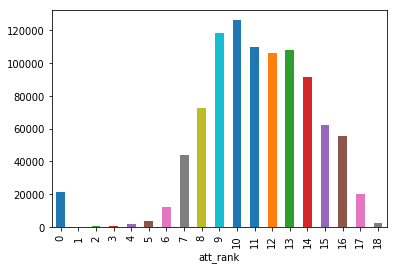

In [19]:
df.groupby('att_rank')['wp'].count().plot(kind='bar')

In [20]:
n_classes = 3
numeric_cats = {
    "att_rank": {0:"0", 1:"0", 2:"0", 3:"0", 4:"0", 5:"0", 6:"0", 
                7:"1", 8:"1", 9:"1", 10:"1", 11:"1", 12:"1",
                13:"2", 14:"2",15:"2", 16:"2", 17:"2", 18:"2"}
}
data.replace(numeric_cats, inplace=True)
data.head()

hp_dmg  hitbox att_rank  vic_rank  avg_match_rank
443853    0.07     0.0        2  0.277778        0.555556
413454    0.10     0.0        1  0.444444        0.333333
912685    0.23     0.0        2  0.944444        1.000000
953833    0.13     1.0        1  0.444444        0.111111
200750    0.28     0.5        1  0.611111        0.333333

In [21]:
y = data['att_rank']
X = data.copy()
del X['att_rank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
knn=neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(len(X_train.index))))
knn.fit(X_train, y_train)

y_pred= knn.predict(X_test)
print accuracy_score(y_test,y_pred)

0.8630045945974233


# Confusion Matrix

/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00      8053
          1       0.85      0.95      0.90    115288
          2       0.89      0.82      0.85     67753

avg / total       0.83      0.86      0.84    191094



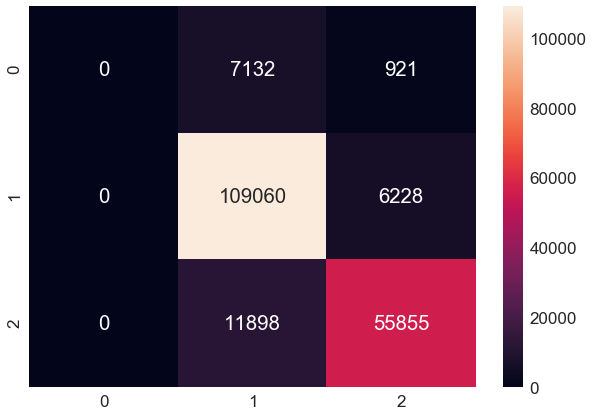

In [22]:
print classification_report(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(n_classes),range(n_classes))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.7)
sn.heatmap(df_cm, annot=True, fmt='g')

# ROC Curve

In [23]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ValueError: Can only tuple-index with a MultiIndex

# Cross Validation

In [ ]:
clf = neighbors.KNeighborsClassifier(n_jobs=-1,n_neighbors=int(math.sqrt(len(X_train.index)))
sss = StratifiedShuffleSplit(n_splits=10)
scoresSSS = cross_val_score(clf, X_train, y_train, cv=sss)
print(scoresSSS)


# Neural Network

In [64]:
import keras
import graphviz
import pydot_ng
from keras.models import Sequential
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

In [65]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=4))
model.add(Dropout(0.5))
for i in range(1,3):
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
pydot.find_graphviz()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

AttributeError: 'module' object has no attribute 'find_graphviz'

In [ ]:
y_trainBinary = to_categorical(y_train)
hist = model.fit(X_train, y_trainBinary,
          epochs=50,
          batch_size=128)


In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

In [ ]:
evals = model.evaluate(X_train, y_trainBinary, batch_size=len(X_train.index)/10)
y_pred= model.predict(X_test)
print evals
print y_pred

# Confusion Matrix

In [ ]:
print classification_report(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(n_classes),range(n_classes))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.7)
sn.heatmap(df_cm, annot=True, fmt='g')


128 4layer ln=0.01 --> 0.841


# Visualization

In [ ]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [knn, model],
                        ['KNN','Neural Network']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()